
# Blind source separation using FastICA


An example of estimating sources from noisy data.

`ICA` is used to estimate sources given noisy measurements.Imagine 3 instruments playing simultaneously and 3 microphones
recording the mixed signals. ICA is used to recover the sources ie. what is played by each instrument. Importantly, PCA fails
at recovering our `instruments` since the related signals reflect non-Gaussian processes.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.decomposition import PCA, FastICA

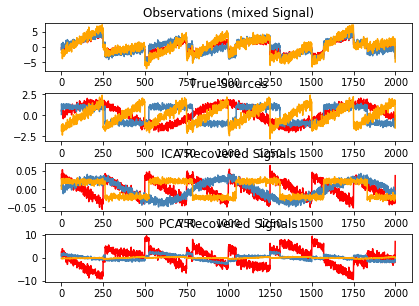

In [3]:
# generate data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin( 2 * time) # Signal 1 : Sine or Sinusoid signal
s2 = np.sign(np.sin(3 * time))# Signal 2 : Square Signal
s3 = signal.sawtooth(2 * np.pi * time)# Signal 3 : Saw tooth Signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  #Add noise

S /= S.std(axis =0)   #Standardize data
#mix data

A=np.array([[1, 1, 1], [0.5, 2,  1.0],[1.5, 1.0, 2.0]])   #Mixing Matrix
X = np.dot(S, A.T)   #Generate Observations

#Compute ICA
ica = FastICA(n_components = 3)
S_ = ica.fit_transform(X)  #Reconstruct signals
A_ = ica.mixing_           #Get estiated mixing matrix

#ICA model applies by reverting the mixing
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

#Compute PCA for comparison
pca = PCA(n_components=3)
H = pca.fit_transform(X)   #Reconstruct Signals based on orthogonal components

#plot all the results
plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed Signal)',
         'True Sources',
         'ICA Recovered Signals',
         'PCA Recovered Signals']
colors = ['red','steelblue', 'orange']

for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, i)
    plt.tight_layout()
    plt.title(name)
    for sign, color in zip(model.T, colors):
        plt.plot(sign, color =color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()
    